In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import requests 
import io
import seaborn as sns

In [ ]:
orig_members = pd.read_csv('/content/drive/MyDrive/text gcn/Hackforum data/CSV Data IronMarch/data_csv/orig_members.csv')

In [ ]:
orig_members.head()

,Unnamed: 0,member_id,name,member_group_id,email,joined,ip_address,posts,title,allow_admin_mails,time_offset,skin,warn_level,warn_lastwarn,language,last_post,restrict_post,view_sigs,view_img,bday_day,bday_month,bday_year,msg_count_new,msg_count_total,msg_count_reset,msg_show_notification,misc,last_visit,last_activity,dst_in_use,coppa_user,mod_posts,auto_track,temp_ban,login_anonymous,ignored_users,mgroup_others,org_perm_id,member_login_key,member_login_key_expire,has_blog,has_gallery,members_auto_dst,members_display_name,members_seo_name,members_created_remote,members_cache,members_disable_pm,members_l_display_name,members_l_username,failed_logins,failed_login_count,members_profile_views,members_pass_hash,members_pass_salt,member_banned,member_uploader,members_bitoptions,fb_uid,fb_emailhash,fb_lastsync,members_day_posts,live_id,twitter_id,twitter_token,twitter_secret,notification_cnt,tc_lastsync,fb_session,fb_token,ips_mobile_token,unacknowledged_warnings,blogs_recache,ipsconnect_id,ipsconnect_revalidate_url
0,0,1,Alexander Slavros,4,slavros_a@mail.ru,1315842419,178.140.119.217,5613,My spirit animal is a landmine,0,3.0,9.0,0.0,0,1,1.458503e+09,NaN,1,1,28,6,0,0,27,0,0,NaN,1458844549,1458843863,1,0,NaN,NaN,0.0,0&1,a:0:{},NaN,NaN,2c3b7d9f0687fe1bb721fee1635f6ff4,1459379030,NaN,0,1,ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ€ Ð¡Ð»Ð°Ð²Ñ€Ð¾Ñ,%d0%b0%d0%bb%d0%b5%d0%ba%d1%81%d0%b0%d0%bd%d0%...,0,"a:12:{s:11:""report_temp"";a:0:{}s:19:""report_la...",0,ðð»ðµðºñð°ð½ð´ñ€ ð¡ð»ð°ð²ñ€ð¾ñ,alexander slavros,[],0,109177,36c2d4d1fffaf1dfd86aec6d4e728c28,!%:xG,0,flash,0,0,NaN,0,"1,1374056788",NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN
1,1,2,Kacen,13,illuminatienlightened@hotmail.com,1315842750,68.37.21.125,1267,THE HATE BUS,1,-5.0,0.0,0.0,0,1,1.443205e+09,NaN,1,1,0,0,0,0,52,0,0,NaN,1457154323,1458153680,1,0,NaN,NaN,0.0,0&1,a:0:{},",3,",NaN,c97ef2471949daac6af7d7d35c8d845c,1458755202,NaN,0,1,Qvis Contra Nos?,qvis-contra-nos,0,"a:8:{s:13:""notifications"";a:17:{s:13:""report_c...",0,qvis contra nos?,kacen,NaN,0,11420,c1a38f798ad4b460991127f3adea8bde,"Ud?,W",0,flash,4096,0,NaN,0,"1,1373586823",NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,3,Blood and Iron,13,renegader23@aim.com,1315851011,68.10.255.89,487,14/88 Bread on the Floor,1,-8.0,9.0,0.0,0,1,1.449196e+09,NaN,1,1,0,0,0,0,35,0,0,NaN,1453607403,1453861982,0,0,NaN,NaN,0.0,0&1,a:0:{},NaN,NaN,b4c335350bccbbcf231330669466f181,1454466782,NaN,0,1,Blood and Iron,blood-and-iron,0,"a:8:{s:7:""friends"";a:33:{i:1;s:1:""1"";i:2;s:1:""...",0,blood and iron,blood and iron,NaN,0,4467,e9dd0f5306b27eda7482320e97f8d776,vO44],0,flash,0,0,NaN,0,"2,1373776594",NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN
3,3,4,Mierce,13,hominemcura@gmail.com,1315859255,82.29.169.221,1704,Multiracial Mierda,0,0.0,0.0,0.0,0,1,1.456787e+09,NaN,1,1,0,0,0,0,39,0,0,NaN,1458044716,1458142748,0,0,NaN,NaN,0.0,0&1,a:0:{},NaN,NaN,bc9e18dde0f7aec519d1238ce1ad980f,1458415777,NaN,0,0,Mierce,mierce,0,"a:9:{s:13:""notifications"";a:17:{s:13:""report_c...",0,mierce,mierce,NaN,0,7483,cb5402d4b0a748a0c5124045ac4cea81,J;]]n,0,flash,0,0,NaN,0,"2,1374174523",NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN
4,4,5,Will to Power,5,tashkentfox@hotmail.co.uk,1315861097,90.214.150.70,463,A fox,1,0.0,0.0,0.0,0,1,1.327590e+09,NaN,1,1,7,12,0,0,1,0,0,NaN,1328201971,1328493137,0,0,NaN,NaN,0.0,0&1,a:0:{},NaN,NaN,24fb95eba9b193eddad58f09d585c2b2,1328806410,NaN,0,1,Will to Power,will-to-power,0,"a:5:{s:7:""friends"";a:1:{i:61;s:1:""1"";}s:15:""gb...",0,will to power,will to power,NaN,0,1318,aa31292e5c2702cbf6fb47b97061fb5d,617rJ,1,flash,0,0,NaN,0,"18,1327509990",NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,NaN


In [ ]:
orig_members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 75 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 763 non-null    int64  
 1   member_id                  763 non-null    int64  
 2   name                       763 non-null    object 
 3   member_group_id            763 non-null    int64  
 4   email                      763 non-null    object 
 5   joined                     763 non-null    int64  
 6   ip_address                 763 non-null    object 
 7   posts                      763 non-null    int64  
 8   title                      98 non-null     object 
 9   allow_admin_mails          763 non-null    int64  
 10  time_offset                755 non-null    float64
 11  skin                       271 non-null    float64
 12  warn_level                 212 non-null    float64
 13  warn_lastwarn              763 non-null    int64  

In [ ]:
orig_members.drop(orig_members.columns[[0, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]], axis =1, inplace=True)

In [ ]:
orig_members

,member_id,name,joined,last_post,last_visit,last_activity,members_profile_views
0,1,Alexander Slavros,1315842419,1.458503e+09,1458844549,1458843863,109177
1,2,Kacen,1315842750,1.443205e+09,1457154323,1458153680,11420
2,3,Blood and Iron,1315851011,1.449196e+09,1453607403,1453861982,4467
3,4,Mierce,1315859255,1.456787e+09,1458044716,1458142748,7483
4,5,Will to Power,1315861097,1.327590e+09,1328201971,1328493137,1318
...,...,...,...,...,...,...,...
758,9956,Hagan,1458239811,NaN,1458634544,1458770188,16
759,9957,TheGreatJeff,1458326928,NaN,1458326988,1458337699,11
760,9959,Kokuryukai,1458377324,NaN,1458377324,1458377324,2
761,9958,BlackNazi,1458348314,NaN,1458701223,1458750459,36


### Create a New Column for Months of Activity

In [ ]:
orig_members['months_activity_period'] = (orig_members['last_activity']-orig_members['joined'])/2592000

In [ ]:
orig_members['months_activity_period'].describe()

count    763.000000
mean      11.553090
std       14.091470
min        0.000000
25%        0.784508
50%        5.536357
75%       17.540503
max       55.170310
Name: months_activity_period, dtype: float64

Text(0, 0.5, 'Count of People')

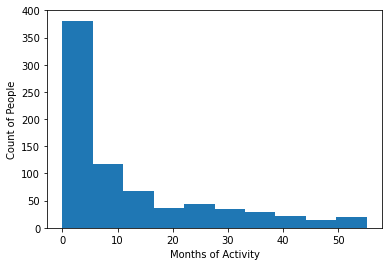

In [ ]:
plt.hist(orig_members['months_activity_period'])
plt.xlabel("Months of Activity")
plt.ylabel("Count of People")

In [ ]:
# plt.hist(np.log(orig_members['months_activity_period'].replace(to_replace=0, value=np.nan)))
# plt.xlabel("Log(Months of Activity)")
# plt.ylabel("Count of People")

In [ ]:
# plt.hist(np.log(orig_members['months_activity_period'].round(0).replace(to_replace=0, value=1)))
# plt.xlabel("Log(Months of Activity)")
# plt.ylabel("Count of People")

In [ ]:
# orig_members['months_activity_period'] = orig_members['months_activity_period'].replace(to_replace=0, value=1)

Steps
1. Rounded off to whole numbers
2. Replace 0 by 1
3. Take log

In [ ]:
# orig_members['months_activity_period'] = np.log(orig_members['months_activity_period'].round(0).replace(to_replace=0, value=1))

# Recency

In [ ]:
orig_members['last_visit'].mean()

1419665917.1520314

In [ ]:
orig_members['last_activity'].mean()

1421939073.6159894

Last_Activity>Last_Visit

But activity seems like doing something and visit feels like juct glancing. I assumed visit to be done later than activity.

Text(0, 0.5, 'Number of Ppl')

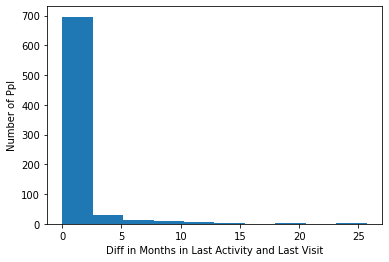

In [ ]:
plt.hist((orig_members['last_activity']-orig_members['last_visit'])/2592000)
plt.xlabel("Diff in Months in Last Activity and Last Visit")
plt.ylabel("Number of Ppl")

Unix Time as of Sept 27, 2017: 1506191400
Sept 19: 1632067522

Months Elapsed since IronMarch was Shutdown

In [ ]:
orig_members['recency'] = 2592000/(1506191400-orig_members['last_activity'])

In [ ]:
orig_members['recency'].describe()

count    763.000000
mean       0.037307
std        0.014480
min        0.013762
25%        0.022328
50%        0.039957
75%        0.052378
max        0.054744
Name: recency, dtype: float64

Text(0, 0.5, 'Number of People')

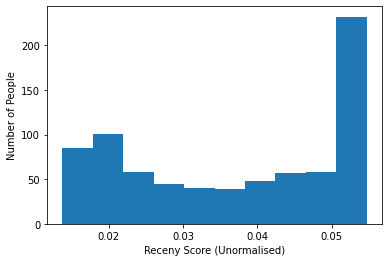

In [ ]:
plt.hist(orig_members['recency'])
plt.xlabel('Receny Score (Unormalised)')
plt.ylabel("Number of People")

In [ ]:
orig_members['n_recency'] = (orig_members['recency']-min(orig_members['recency']))/(max(orig_members['recency'])-min(orig_members['recency']))

Text(0, 0.5, 'Number of People')

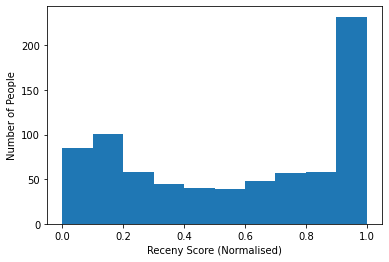

In [ ]:
plt.hist(orig_members['n_recency'])
plt.xlabel('Receny Score (Normalised)')
plt.ylabel("Number of People")

# Popularity

#### Number of Feedback: Since we don't have ratings for every person, would it make sense to look at profile views?

In [ ]:
orig_members['popular'] = orig_members['members_profile_views'] *orig_members['months_activity_period']

Taking Log

Text(0, 0.5, 'Count of People')

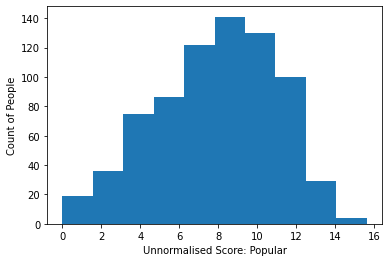

In [ ]:
plt.hist(np.log(orig_members['popular'].round(0).replace(to_replace=0, value=np.nan)))
plt.xlabel("Unnormalised Score: Popular")
plt.ylabel("Count of People")

In [ ]:
orig_members['popular'] =1+ np.log(orig_members['popular'].round(0).replace(to_replace=0, value=np.nan))
orig_members['n_popular'] = (orig_members['popular']-min(orig_members['popular']))/(max(orig_members['popular'])-min(orig_members['popular']))

Text(0, 0.5, 'Count of People')

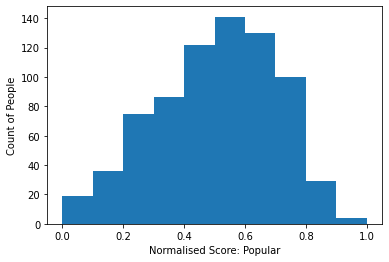

In [ ]:
plt.hist(orig_members['n_popular'])
plt.xlabel("Normalised Score: Popular")
plt.ylabel("Count of People")

# Final Dataset

In [ ]:
orig_members

,member_id,name,joined,last_post,last_visit,last_activity,members_profile_views,months_activity_period,recency,n_recency,popular,n_popular
0,1,Alexander Slavros,1315842419,1.458503e+09,1458844549,1458843863,109177,55.170310,0.054744,1.000000,15.611151,1.000000
1,2,Kacen,1315842750,1.443205e+09,1457154323,1458153680,11420,54.903908,0.053958,0.980808,13.348707,0.855075
2,3,Blood and Iron,1315851011,1.449196e+09,1453607403,1453861982,4467,53.244973,0.049532,0.872828,12.379374,0.792983
3,4,Mierce,1315859255,1.456787e+09,1458044716,1458142748,7483,54.893323,0.053945,0.980508,12.925781,0.827984
4,5,Will to Power,1315861097,1.327590e+09,1328201971,1328493137,1318,4.873472,0.014587,0.020119,8.767641,0.561627
...,...,...,...,...,...,...,...,...,...,...,...,...
758,9956,Hagan,1458239811,NaN,1458634544,1458770188,16,0.204621,0.054659,0.997925,1.098612,0.070374
759,9957,TheGreatJeff,1458326928,NaN,1458326988,1458337699,11,0.004155,0.054165,0.985871,NaN,NaN
760,9959,Kokuryukai,1458377324,NaN,1458377324,1458377324,2,0.000000,0.054210,0.986966,NaN,NaN
761,9958,BlackNazi,1458348314,NaN,1458701223,1458750459,36,0.155149,0.054636,0.997370,1.791759,0.114774


In [ ]:
orig_members = orig_members.replace(to_replace=np.nan, value=0)

In [ ]:
orig_members.to_csv("/content/drive/MyDrive/text gcn/created_csv/ironmarch/orig_score_rec_pop.csv")